<a href="https://colab.research.google.com/github/ilhamfachlevi/-03_Reproducible-Research-Insight-as-a-Code-/blob/main/Copy_of_Muhammad_Ilham_Fachlevi_DS03017_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# kaggle installation

In [ ]:
# install kaggle
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"milhamfachlevi","key":"b7c866182fbd6d70be22a6aff25d66b1"}'}

In [ ]:
# create a kaggle folder
!mkdir ~/.kaggle

In [ ]:
# copy the kaggle.json to folder created  
!cp kaggle.json ~/.kaggle/

In [ ]:
# permisson for the json to act
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# to list all avalaible datasets in kaggle
!kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04          13291        380  1.0              
narayan63/netflix-popular-movies-dataset                       Netflix popular movies dataset                        1MB  2022-09-24 08:23:22           1378         34  0.9411765        
anushabellam/trending-videos-on-youtube                        Trending videos on Youtube                           29KB  2022-09-20 12:12:35           1032         32  1.0              
whenamancodes/student-performance                              St

In [ ]:
!kaggle datasets download -d olistbr/brazilian-ecommerce

 63% 27.0M/42.6M [00:00<00:00, 149MB/s] 
100% 42.6M/42.6M [00:00<00:00, 166MB/s]


In [ ]:
ls

brazilian-ecommerce.zip  kaggle.json  sample_data/


# import libraries needed

In [ ]:
import pandas as pd
import numpy as np
import glob
import os
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import datetime as dt
import statsmodels.api as sm

In [ ]:
#!conda --version

In [ ]:
"""!pip install -q condacolab
import condacolab
condacolab.install()"""

'!pip install -q condacolab\nimport condacolab\ncondacolab.install()'

In [ ]:
with zipfile.ZipFile("/content/brazilian-ecommerce.zip","r") as zip_ref:
    zip_ref.extractall("brazilian-ecommerce")

In [ ]:
path = r'/content/brazilian-ecommerce' 
all_files = glob.glob(os.path.join(path , "*.csv"))

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [ ]:
print(all_files)

['/content/brazilian-ecommerce/olist_sellers_dataset.csv', '/content/brazilian-ecommerce/olist_orders_dataset.csv', '/content/brazilian-ecommerce/olist_geolocation_dataset.csv', '/content/brazilian-ecommerce/product_category_name_translation.csv', '/content/brazilian-ecommerce/olist_order_items_dataset.csv', '/content/brazilian-ecommerce/olist_customers_dataset.csv', '/content/brazilian-ecommerce/olist_products_dataset.csv', '/content/brazilian-ecommerce/olist_order_reviews_dataset.csv', '/content/brazilian-ecommerce/olist_order_payments_dataset.csv']


# initializing variables

In [ ]:
customers = pd.read_csv('/content/brazilian-ecommerce/olist_customers_dataset.csv')
geolocation = pd.read_csv('/content/brazilian-ecommerce/olist_geolocation_dataset.csv')
items = pd.read_csv('/content/brazilian-ecommerce/olist_order_items_dataset.csv')
payments = pd.read_csv('/content/brazilian-ecommerce/olist_order_payments_dataset.csv')
reviews = pd.read_csv('/content/brazilian-ecommerce/olist_order_reviews_dataset.csv')
orders = pd.read_csv('/content/brazilian-ecommerce/olist_orders_dataset.csv')
products = pd.read_csv('/content/brazilian-ecommerce/olist_products_dataset.csv')
name = pd.read_csv('/content/brazilian-ecommerce/product_category_name_translation.csv')
sellers = pd.read_csv('/content/brazilian-ecommerce/olist_sellers_dataset.csv')

In [ ]:
data = {
    'customers': customers,
    'geolocation': geolocation,
    'items': items,
    'paymens':payments,
    'reviews':reviews,
    'orders':orders,
    'products':products,
    'name':name,
    'sellers':sellers
}

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [ ]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
for name, df in data.items():
  key_count = [col for col in df.columns if 'id' in col or 'code' in col]
  print(f'{name}: {len(key_count)} PKs pr FKs')
  print(f'{key_count}\n')

customers: 3 PKs pr FKs
['customer_id', 'customer_unique_id', 'customer_zip_code_prefix']

geolocation: 1 PKs pr FKs
['geolocation_zip_code_prefix']

items: 4 PKs pr FKs
['order_id', 'order_item_id', 'product_id', 'seller_id']

paymens: 1 PKs pr FKs
['order_id']

reviews: 2 PKs pr FKs
['review_id', 'order_id']

orders: 2 PKs pr FKs
['order_id', 'customer_id']

products: 2 PKs pr FKs
['product_id', 'product_width_cm']

name: 0 PKs pr FKs
[]

sellers: 2 PKs pr FKs
['seller_id', 'seller_zip_code_prefix']



# data cleaning

In [ ]:
for name, df in data.items():
  if df.isnull().any().any():
    print('dataset:',name ,"\n")
    print(f'{df.isnull().sum()}\n')

dataset: reviews 

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

dataset: orders 

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

dataset: products 

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64



In [ ]:
orders = orders.dropna(axis='index',subset=['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date'])

In [ ]:
products = products.dropna(axis='index',subset=['product_category_name', 'product_name_lenght', 'product_description_lenght',
                                                'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_width_cm' ])

In [ ]:
# reviews = reviews.dropna(axis='index',subset=['review_comment_title', 'review_comment_message'])

In [ ]:
orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [ ]:
products.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [ ]:
payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

# transforming data

In [ ]:
"""data['orders'].order_purchase_timestamp = pd.to_datetime(data['orders'].order_purchase_timestamp).dt.date
data['orders'].order_delivered_customer_date = pd.to_datetime(data['orders'].order_delivered_customer_date).dt.date
data['orders'].order_estimated_delivery_date = pd.to_datetime(data['orders'].order_estimated_delivery_date).dt.date"""

"data['orders'].order_purchase_timestamp = pd.to_datetime(data['orders'].order_purchase_timestamp).dt.date\ndata['orders'].order_delivered_customer_date = pd.to_datetime(data['orders'].order_delivered_customer_date).dt.date\ndata['orders'].order_estimated_delivery_date = pd.to_datetime(data['orders'].order_estimated_delivery_date).dt.date"

In [ ]:
times = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
         'order_estimated_delivery_date', 'order_estimated_delivery_date']

for col in times:
  orders[col]=pd.to_datetime(orders[col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


# merging data

In [ ]:
data_schema = orders.merge(customers, on="customer_id").merge(items, on="order_id").merge(products, on="product_id").merge(payments, on="order_id").merge(sellers, on="seller_id").merge(reviews, on="order_id")

In [ ]:
data_schema.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,review_creation_date,review_answer_timestamp,product_name,seller,score,prices,customer,payment,day_of_week,day_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,maua,4,29,b10a928d,18,0,Monday
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,maua,4,29,b10a928d,2,0,Monday
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,maua,4,29,b10a928d,18,0,Monday
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,2017-08-19 00:00:00,2017-08-20 15:16:36,utilidades_domesticas,maua,4,29,7daa0831,37,1,Tuesday
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,ef0996a1a279c26e7ecbd737be23d235,2290,...,2017-08-08 00:00:00,2017-08-08 23:26:23,utilidades_domesticas,maua,5,29,fbd34d34,37,2,Wednesday


In [ ]:
items['price']

0          58.90
1         239.90
2         199.00
3          12.99
4         199.90
           ...  
112645    299.99
112646    350.00
112647     99.90
112648     55.99
112649     43.00
Name: price, Length: 112650, dtype: float64

In [ ]:
data_schema[['price', 'product_category_name']]

,price,product_category_name
0,29.99,utilidades_domesticas
1,29.99,utilidades_domesticas
2,29.99,utilidades_domesticas
3,29.99,utilidades_domesticas
4,29.99,utilidades_domesticas
...,...,...
113211,79.00,construcao_ferramentas_iluminacao
113212,399.00,moveis_decoracao
113213,69.90,eletronicos
113214,219.90,moveis_decoracao


# The Number of Product Orders Purchased Based on The States

Text(0.5, 1.0, 'Product Orders Purchased Based on The States')

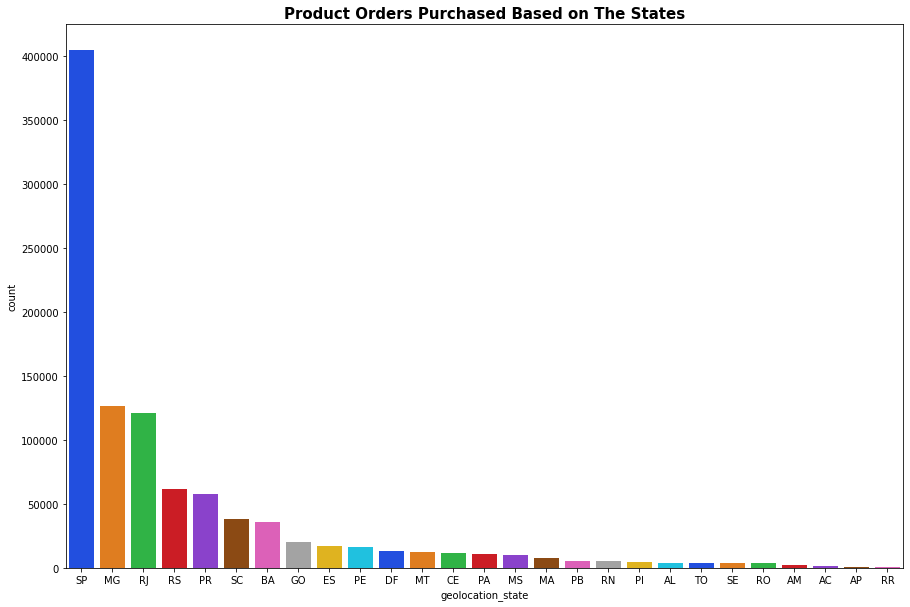

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x ='geolocation_state', data=geolocation, 
              order=geolocation['geolocation_state'].value_counts().sort_values(ascending=False).index, 
              palette='bright').set_title("Product Orders Purchased Based on The States", fontsize=15,
                                             weight='bold')

# The Amount of Online Order by Year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

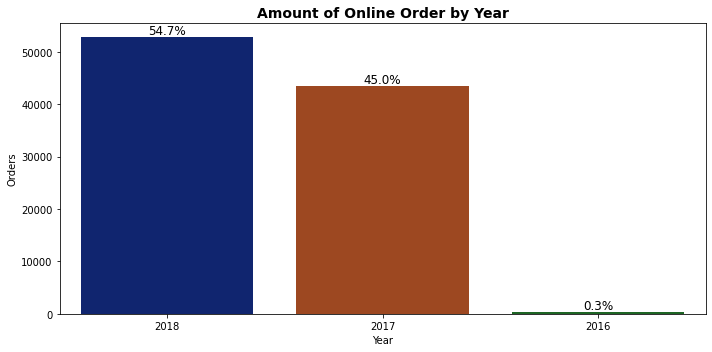

In [ ]:
orders['order_purchase_year'] = \
orders['order_purchase_timestamp'].apply(lambda x: x.year)
orders['order_purchase_month'] = \
orders['order_purchase_timestamp'].apply(lambda x: x.month)
orders['order_purchase_dayofweek'] = \
orders['order_purchase_timestamp'].apply(lambda x: x.dayofweek)

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x='order_purchase_year', data=orders, order=orders['order_purchase_year'].value_counts().
                   sort_values(ascending=False).index, palette='dark')

ncount = len(orders)

for p in ax.patches:
 x=p.get_bbox().get_points()[:,0]
 y=p.get_bbox().get_points()[1,1]
 ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
 ha='center', va='bottom', size=12)

ax.set_title('Amount of Online Order by Year', size=14, weight='bold')
ax.set_ylabel('Orders')
ax.set_xlabel('Year')
plt.tight_layout()
plt.show()

# Plotting Top 3 Products

Text(0.5, 1.0, 'Top 3 Products')

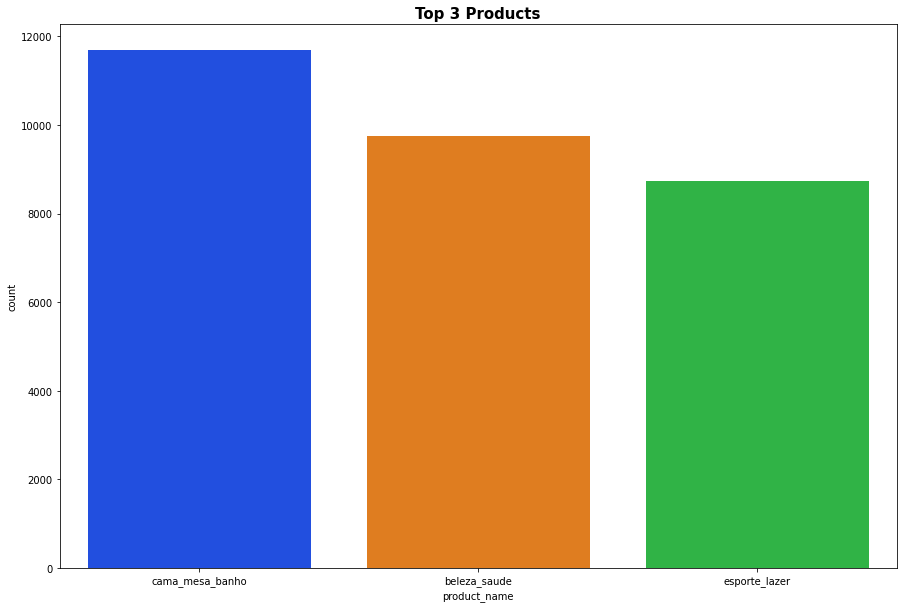

In [ ]:
data_schema['product_name']=data_schema['product_category_name']
plt.figure(figsize=(15,10))
sns.countplot(x='product_name', data=data_schema, palette='bright',
             order=data_schema['product_name'].value_counts()[:3]\
             .sort_values(ascending=False).index).set_title("Top 3 Products", fontsize=15,
                                             weight='bold')

# Plotting Top 5 Products

Text(0.5, 1.0, 'Top 5 Producs')

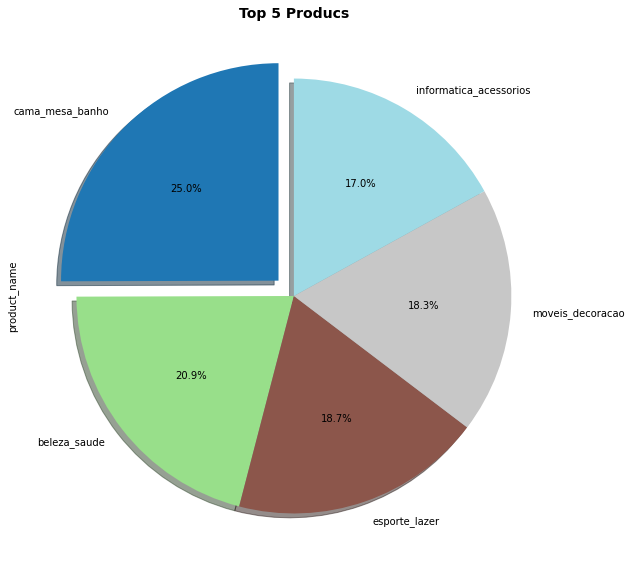

In [ ]:
plt.figure(figsize=(15,10))
data_schema['product_name'].value_counts()[:5].plot.pie(autopct='%1.1f%%', 
        startangle=90, cmap='tab20', explode= (0.1, 0, 0, 0,0),
        shadow=True)
plt.title("Top 5 Producs",size=14, weight='bold')

# Plotting Top 3 Seller States

In [ ]:
data_schema['seller']=data_schema['seller_city']

Text(0.5, 1.0, 'Top 3 Seller Cities')

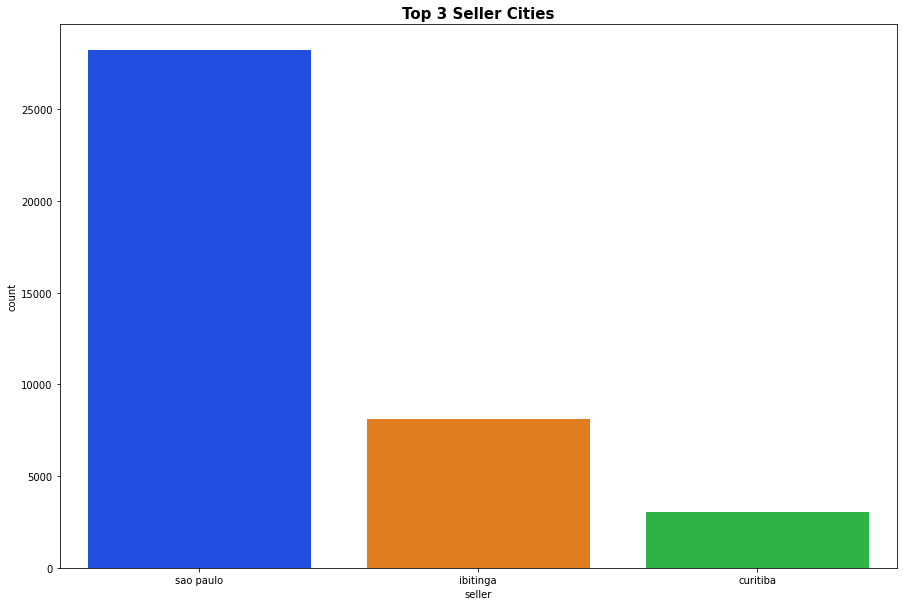

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='seller', data=data_schema, palette='bright',
             order=data_schema['seller'].value_counts()[:3]\
             .sort_values(ascending=False).index).set_title("Top 3 Seller Cities", fontsize=15,
                                             weight='bold')

# Plotting Top 5 Seller Cities

Text(0.5, 1.0, 'Top 5 Cities')

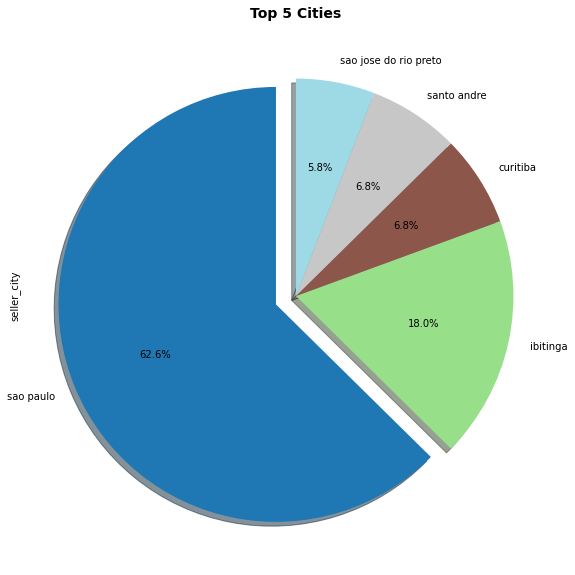

In [ ]:
plt.figure(figsize=(15,10))
data_schema['seller_city'].value_counts()[:5].plot.pie(autopct='%1.1f%%', 
        startangle=90, cmap='tab20', explode = (0.1, 0, 0, 0,0),
        shadow=True)
plt.title("Top 5 Cities",size=14, weight='bold')

# Reviews Score Distributed

Text(0.5, 1.0, 'Reviews Score Distributed')

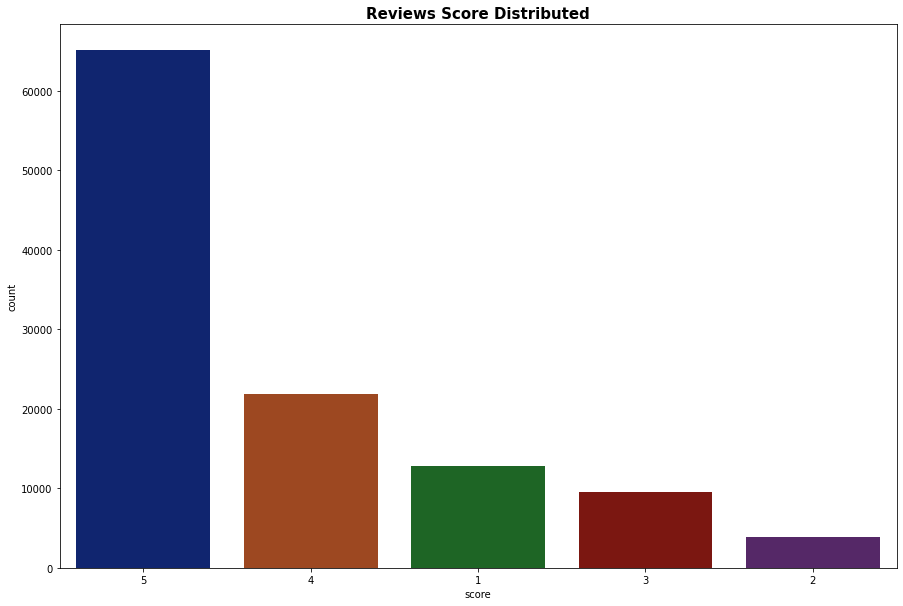

In [ ]:
data_schema['score']=data_schema['review_score']
plt.figure(figsize=(15,10))
sns.countplot(x='score', data=data_schema, palette='dark',
             order=data_schema['score'].value_counts()
             .sort_values(ascending=False).index).set_title("Reviews Score Distributed", fontsize=15,
                                             weight='bold')

Text(0.5, 1.0, 'Reviews Score Distributed')

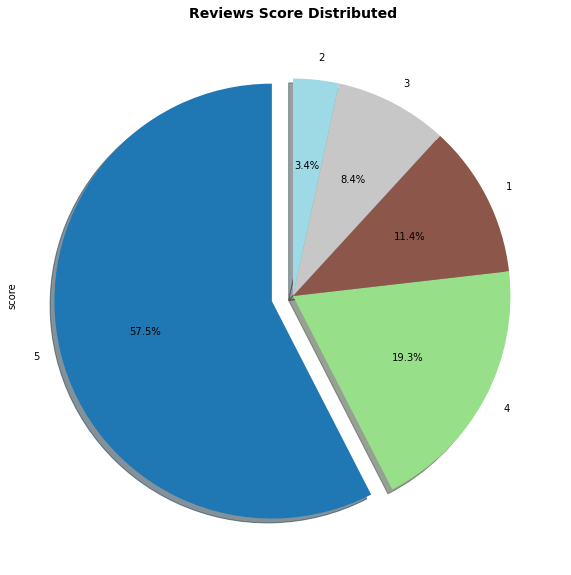

In [ ]:
plt.figure(figsize=(20,10))
data_schema['score'].value_counts()[:5].plot.pie(autopct='%1.1f%%', 
        startangle=90, cmap='tab20', explode = (0.1, 0, 0, 0,0),
        shadow=True)
plt.title("Reviews Score Distributed",size=14, weight='bold')

# Top Payments

In [ ]:
data_schema['prices'] = data_schema['price'].astype(int)

In [ ]:
data_schema['price'] = data_schema['payment_type']

Text(0.5, 1.0, 'Top Payments')

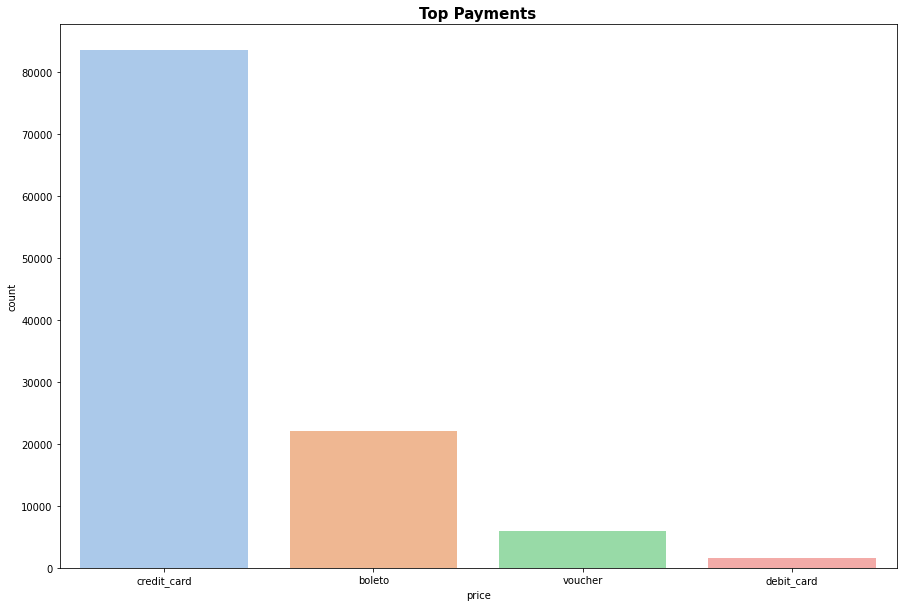

In [ ]:
data_schema['price']=data_schema['price']
plt.figure(figsize=(15,10))
sns.countplot(x='price', data=data_schema, palette='pastel',
             order=data_schema['price'].value_counts()[:10]\
             .sort_values(ascending=False).index).set_title("Top Payments", fontsize=15,
                                             weight='bold')

# Top Payments with The Highest Value

In [ ]:
data_schema['payment'] = data_schema['payment_value'].astype(int)

In [ ]:
top_payments = data_schema.groupby("payment_type")["payment"].max().reset_index().sort_values("payment", ascending=False)
top_payments.rename(columns={"payment":"total_paid"}, inplace=True)
top_payments

,payment_type,total_paid
1,credit_card,13664
0,boleto,7274
2,debit_card,4445
3,voucher,1839


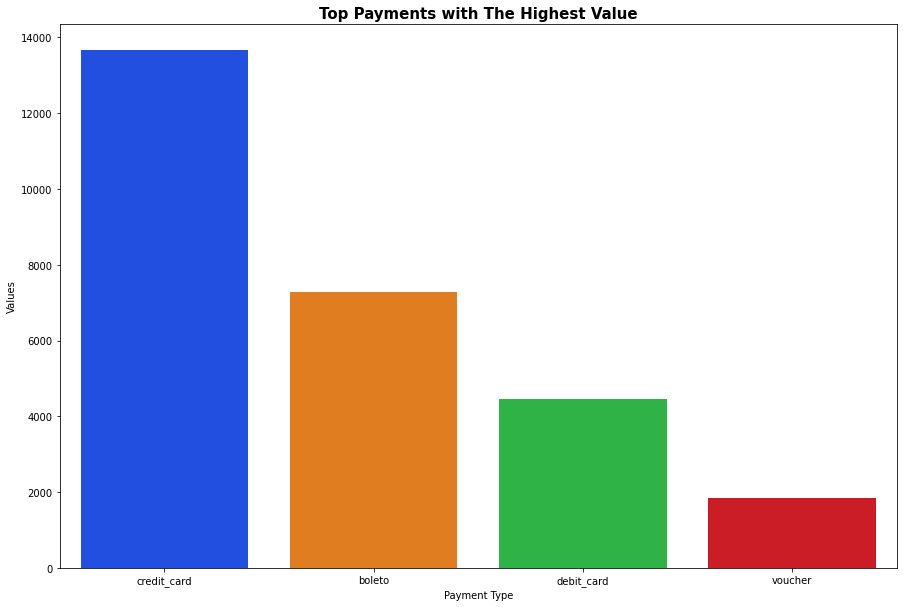

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='payment_type', y='total_paid', data=top_payments, palette='bright')
ax.set_title('Top Payments with The Highest Value', size=15, weight='bold')
ax.set_xlabel('Payment Type')
ax.set_ylabel('Values')
plt.show()

# Top Product Category with The Highest Price

In [ ]:
data_schema[['price','product_category_name']]

,price,product_category_name
0,29.99,utilidades_domesticas
1,29.99,utilidades_domesticas
2,29.99,utilidades_domesticas
3,29.99,utilidades_domesticas
4,29.99,utilidades_domesticas
...,...,...
113211,79.00,construcao_ferramentas_iluminacao
113212,399.00,moveis_decoracao
113213,69.90,eletronicos
113214,219.90,moveis_decoracao


In [ ]:
data_schema['price'] = data_schema['price'].astype(int)

In [ ]:
data_schema['price']

0          29
1          29
2          29
3          29
4          29
         ... 
113211     79
113212    399
113213     69
113214    219
113215     15
Name: price, Length: 113216, dtype: int64

In [ ]:
data_schema['price'].describe()

count    113216.000000
mean        119.267824
std         181.194276
min           0.000000
25%          39.000000
50%          74.000000
75%         132.250000
max        6735.000000
Name: price, dtype: float64

In [ ]:
top_price = data_schema.groupby("product_category_name")["price"].max().reset_index().sort_values("price", ascending=False)
top_price.rename(columns={"price":"total_price"}, inplace=True)
top_price

,product_category_name,total_price
72,utilidades_domesticas,6735
3,artes,6499
31,eletroportateis,4799
61,pcs,4590
45,instrumentos_musicais,4399
...,...,...
69,tablets_impressao_imagem,152
42,fraldas_higiene,139
37,fashion_roupa_infanto_juvenil,110
17,cds_dvds_musicais,65


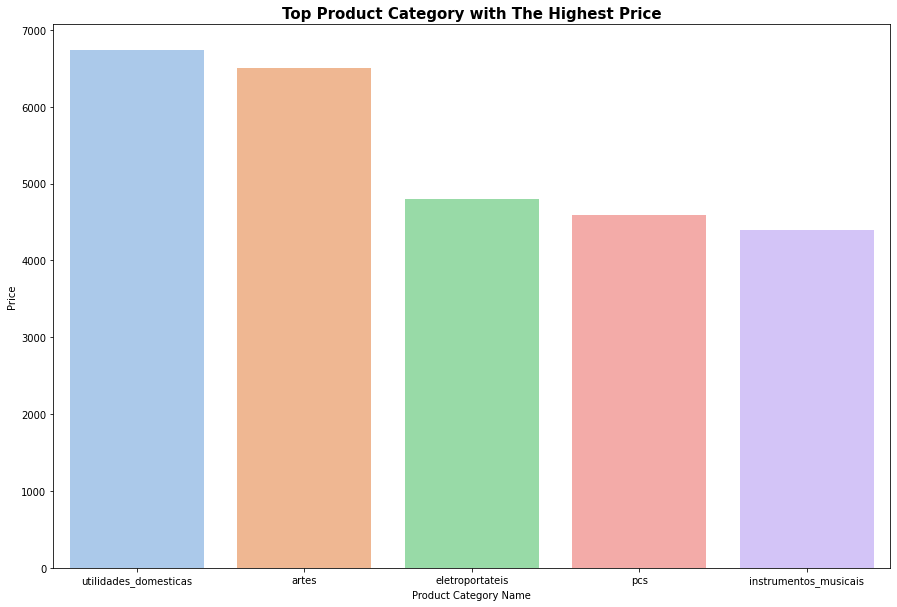

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='product_category_name', y='total_price', data=top_price[:5], palette='pastel')
ax.set_title('Top Product Category with The Highest Price', size=15, weight='bold')
ax.set_xlabel('Product Category Name')
ax.set_ylabel('Price')
plt.show()

# Top Product Category with The Highest Freight Value

In [ ]:
data_schema['freight_value'] = data_schema['freight_value'].astype(int)

In [ ]:
top_products = data_schema.groupby("product_category_name")["freight_value"].max().reset_index().sort_values("freight_value", ascending=False)
top_products.rename(columns={"freight_value":"total_value"}, inplace=True)
top_products

,product_category_name,total_value
9,bebes,409
72,utilidades_domesticas,375
11,beleza_saude,338
21,construcao_ferramentas_construcao,321
43,industria_comercio_e_negocios,317
...,...,...
67,seguros_e_servicos,25
41,flores,22
36,fashion_roupa_feminina,22
15,casa_conforto_2,19


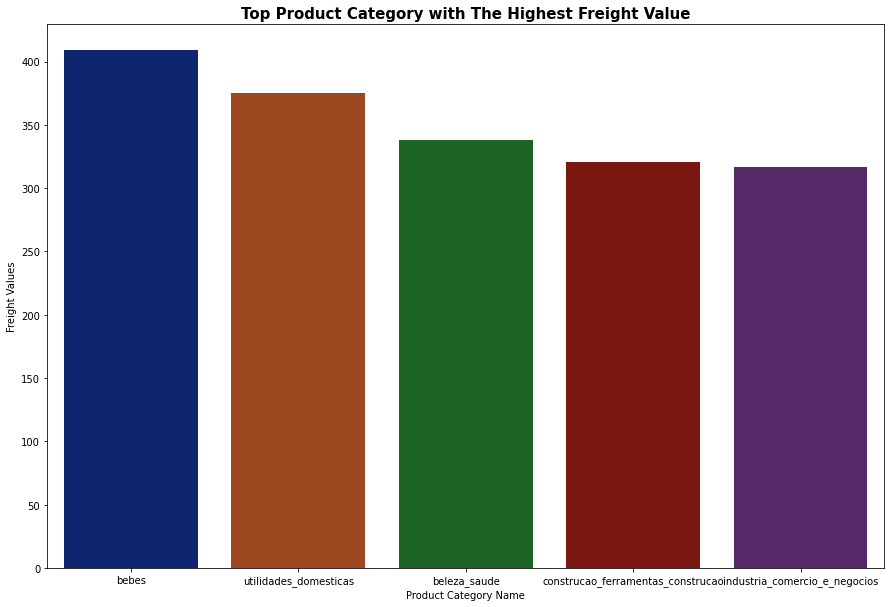

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='product_category_name', y='total_value', data=top_products[:5], palette='dark')
ax.set_title('Top Product Category with The Highest Freight Value', size=15, weight='bold')
ax.set_xlabel('Product Category Name')
ax.set_ylabel('Freight Values')
plt.show()

# Top 10 Customers

In [ ]:
top_customers = data_schema.groupby("customer_id")["payment_value"].sum().reset_index().sort_values("payment_value", ascending=False)
top_customers.rename(columns={"payment_value":"total_paid"}, inplace=True)
top_customers

,customer_id,total_paid
8144,1617b1357756262bfa56ab541c47bc16,109312
70455,be1b70680b9f9694d8c70f41fa3dc92b,44040
1971,05455dfa7cd02f13d132aa7a6a9729c6,36486
11832,1ff773612ab8934db89fd5afa8afe506,30180
87426,ec5b2ba62e574342386871631fafd3fc,29096
...,...,...
72798,c466c7e0ab222e3ef6c8046e96128a8d,11
52446,8e4bd65db637116b6b68109e4df21b84,10
1659,046f890135acc703faff4c1fc0c2d73c,10
9014,184e8e8e48937145eb96c721ef1f0747,10


In [ ]:
top_customers['customer'] = top_customers['customer_id'].str[-8:]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

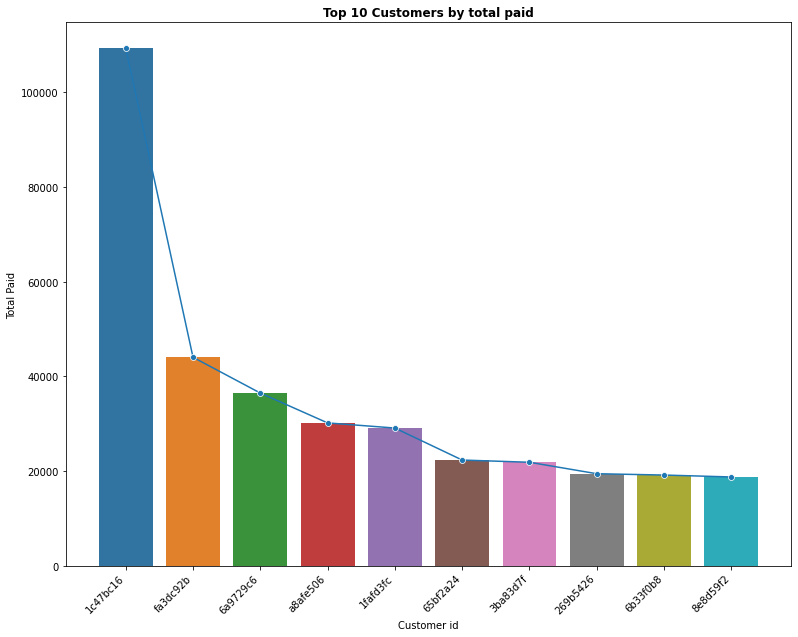

In [ ]:
top_customers.rename(columns={"payment_value" : "total_paid"}, inplace=True)
fig, ax = plt.subplots(figsize=(13, 10))
ax = sns.barplot(x='customer', y="total_paid", data=top_customers[:10])
sns.lineplot(data = top_customers[:10], marker='o', x="customer", y="total_paid", sort = False, ax=ax)
ax.set_title("Top 10 Customers by total paid", weight='bold')
ax.set_ylabel("Total Paid")
ax.set_xlabel("Customer id")
plt.xticks(rotation=45, ha='right')

# Top 10 Sellers

In [ ]:
top_sellers = data_schema.groupby("seller_id")["score"].sum().reset_index().sort_values("score", ascending=False)
top_sellers.rename(columns={"score":"total_score"}, inplace=True)
top_sellers

,seller_id,total_score
1170,6560211a19b47992c3666cc44a7e94c0,8200
844,4a3ca9315b744ce9f8e9374361493884,8005
351,1f50f920176fa81dab994f9023523100,7988
2337,cc419e0650a3c5ba77189a1882b7556a,7541
2490,da8622b14eb17ae2831f4ac5b9dab84a,6724
...,...,...
2202,c1dde11f12d05c478f5de2d7319ad3b2,1
282,19484c79cef6c062cb177aa4ef2fcc3c,1
297,1b4b28463457a256e9a784ebe2a8f630,1
1636,8d92f3ea807b89465643c219455e7369,1


In [ ]:
top_sellers['seller'] = top_sellers['seller_id'].str[-8:]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

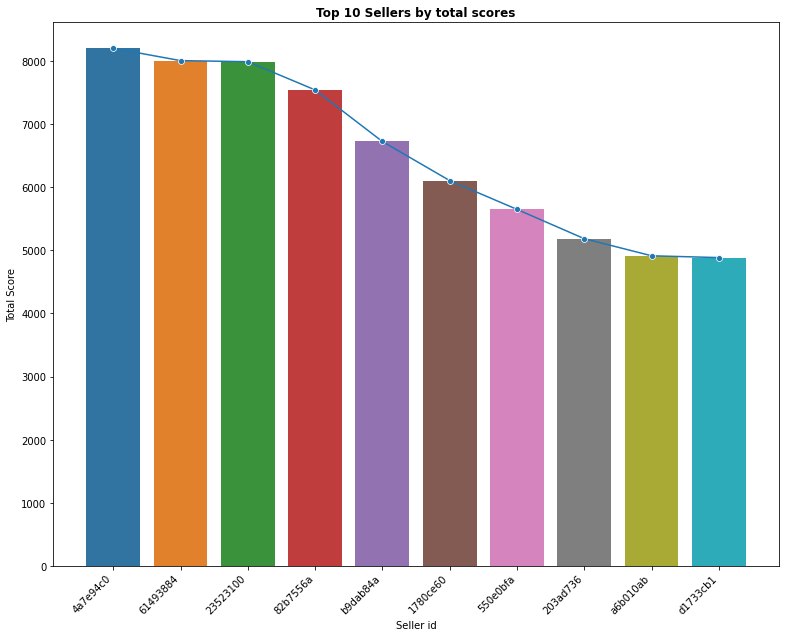

In [ ]:
fig, ax = plt.subplots(figsize=(13, 10))
ax = sns.barplot(x="seller", y="total_score", data=top_sellers[:10])
sns.lineplot(data = top_sellers[:10], marker='o', x="seller", y="total_score", sort = False, ax=ax)
ax.set_title("Top 10 Sellers by total scores", weight='bold')
ax.set_ylabel("Total Score")
ax.set_xlabel("Seller id")
plt.xticks(rotation=45, ha='right')

# Top 5 Cities by Number of Orders

In [ ]:
top_orders_cities = data_schema.groupby("customer_city")["order_id"].count().reset_index().sort_values("order_id", ascending=False)
top_orders_cities.rename(columns={"order_id":"count"}, inplace=True)
top_orders_cities

,customer_city,count
3552,sao paulo,17872
3117,rio de janeiro,7786
448,belo horizonte,3141
552,brasilia,2382
1133,curitiba,1767
...,...,...
2157,mamonas,1
2152,malhador,1
2149,major porto,1
2145,maiquinique,1


Text(0, 0.5, 'Count')

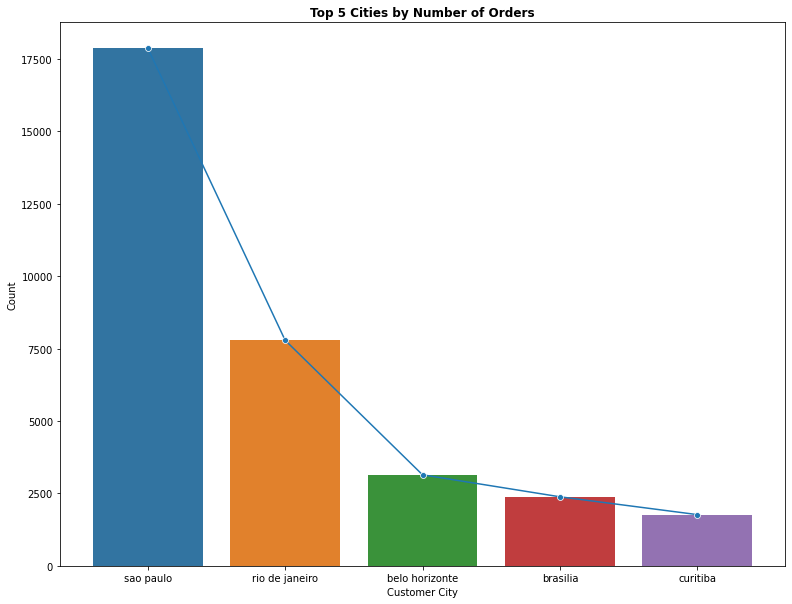

In [ ]:
top_orders_cities = data_schema.groupby("customer_city")["order_id"].count().reset_index().sort_values("order_id", ascending=False)
top_orders_cities.rename(columns={"order_id":"count"}, inplace=True)
fig, ax = plt.subplots(figsize=(13, 10))
ax = sns.barplot(x="customer_city", y="count", data=top_orders_cities[:5])
sns.lineplot(data = top_orders_cities[:5], marker='o', x="customer_city", y="count", sort = False, ax=ax)
ax.set_title("Top 5 Cities by Number of Orders", weight='bold')
ax.set_xlabel("Customer City")
ax.set_ylabel("Count")

# Top 5 States by Number of Orders

In [ ]:
top_orders_states = data_schema.groupby("customer_state")["order_id"].count().reset_index().sort_values("order_id", ascending=False)
top_orders_states.rename(columns={"order_id":"count"}, inplace=True)
top_orders_states

,customer_state,count
25,SP,47823
18,RJ,14569
10,MG,13220
22,RS,6312
17,PR,5790
23,SC,4143
4,BA,3845
6,DF,2397
8,GO,2305
7,ES,2268


Text(0, 0.5, 'Count')

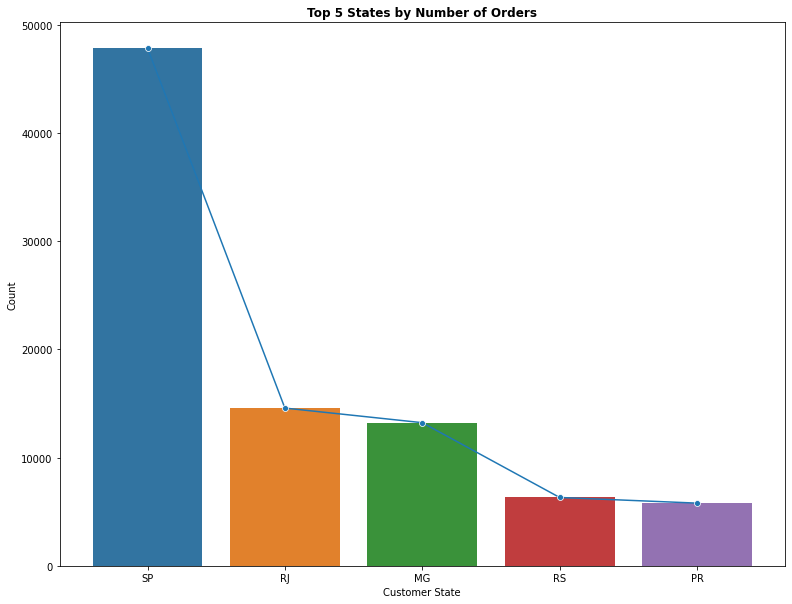

In [ ]:
top_orders_cities = data_schema.groupby("customer_state")["order_id"].count().reset_index().sort_values("order_id", ascending=False)
top_orders_cities.rename(columns={"order_id":"count"}, inplace=True)
fig, ax = plt.subplots(figsize=(13, 10))
ax = sns.barplot(x="customer_state", y="count", data=top_orders_cities[:5])
sns.lineplot(data = top_orders_cities[:5], marker='o', x="customer_state", y="count", sort = True, ax=ax)
ax.set_title("Top 5 States by Number of Orders", weight='bold')
ax.set_xlabel("Customer State")
ax.set_ylabel("Count")

# The Day with Highest Demand of Transaction

In [ ]:
data_schema['day_of_week'] = data_schema['order_purchase_timestamp'].dt.dayofweek

In [ ]:
data_schema

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,review_comment_message,review_creation_date,review_answer_timestamp,product_name,seller,score,prices,customer,payment,day_of_week
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,maua,4,29,b10a928d,18,0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,maua,4,29,b10a928d,2,0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,maua,4,29,b10a928d,18,0
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,utilidades_domesticas,maua,4,29,7daa0831,37,1
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,ef0996a1a279c26e7ecbd737be23d235,2290,...,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,utilidades_domesticas,maua,5,29,fbd34d34,37,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113211,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20,2077f7ec37df79c62cc24b7b8f30e8c9,8528,...,NaN,2018-07-10 00:00:00,2018-07-10 18:32:29,construcao_ferramentas_iluminacao,porto ferreira,5,79,ad6b190a,93,6
113212,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35,2018-08-16,8cf3c6e1d2c8afaab2eda3fa01d4e3d2,60455,...,NaN,2018-08-03 00:00:00,2018-08-04 11:22:40,moveis_decoracao,americana,5,399,410d8d3c,444,1
113213,ba4ff7bab012df64eed239c402ba6a0d,48ebd9467fef647e9a0cd9c1b9bdbe24,delivered,2018-01-11 23:07:22,2018-01-11 23:15:46,2018-01-22 21:32:12,2018-01-30 11:11:47,2018-02-09,5b4c417664eae14efe4633d6982812c2,84130,...,"Produto entregue correto, antes do prazo estip...",2018-01-31 00:00:00,2018-02-01 02:09:59,eletronicos,sao paulo,5,69,b9bdbe24,86,3
113214,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05-22 21:13:21,2018-05-22 21:35:40,2018-05-24 12:28:00,2018-06-12 23:11:29,2018-06-08,e55e436481078787e32349cee9febf5e,39803,...,NaN,2018-06-10 00:00:00,2018-06-13 09:17:47,moveis_decoracao,sao paulo,4,219,5929b5a7,244,1


In [ ]:
def dayNameFromWeekday(weekday):
    if weekday == 0:
        return "Monday"
    if weekday == 1:
        return "Tuesday"
    if weekday == 2:
        return "Wednesday"
    if weekday == 3:
        return "Thursday"
    if weekday == 4:
        return "Friday"
    if weekday == 5:
        return "Saturday"
    if weekday == 6:
        return "Sunday"

In [ ]:
data_schema['day_name'] = data_schema['day_of_week'].apply(dayNameFromWeekday)
data_schema.drop('day_of_week',axis=1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,review_comment_message,review_creation_date,review_answer_timestamp,product_name,seller,score,prices,customer,payment,day_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,maua,4,29,b10a928d,18,Monday
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,maua,4,29,b10a928d,2,Monday
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,maua,4,29,b10a928d,18,Monday
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,utilidades_domesticas,maua,4,29,7daa0831,37,Tuesday
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,ef0996a1a279c26e7ecbd737be23d235,2290,...,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,utilidades_domesticas,maua,5,29,fbd34d34,37,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113211,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20,2077f7ec37df79c62cc24b7b8f30e8c9,8528,...,NaN,2018-07-10 00:00:00,2018-07-10 18:32:29,construcao_ferramentas_iluminacao,porto ferreira,5,79,ad6b190a,93,Sunday
113212,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35,2018-08-16,8cf3c6e1d2c8afaab2eda3fa01d4e3d2,60455,...,NaN,2018-08-03 00:00:00,2018-08-04 11:22:40,moveis_decoracao,americana,5,399,410d8d3c,444,Tuesday
113213,ba4ff7bab012df64eed239c402ba6a0d,48ebd9467fef647e9a0cd9c1b9bdbe24,delivered,2018-01-11 23:07:22,2018-01-11 23:15:46,2018-01-22 21:32:12,2018-01-30 11:11:47,2018-02-09,5b4c417664eae14efe4633d6982812c2,84130,...,"Produto entregue correto, antes do prazo estip...",2018-01-31 00:00:00,2018-02-01 02:09:59,eletronicos,sao paulo,5,69,b9bdbe24,86,Thursday
113214,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05-22 21:13:21,2018-05-22 21:35:40,2018-05-24 12:28:00,2018-06-12 23:11:29,2018-06-08,e55e436481078787e32349cee9febf5e,39803,...,NaN,2018-06-10 00:00:00,2018-06-13 09:17:47,moveis_decoracao,sao paulo,4,219,5929b5a7,244,Tuesday


Text(0.5, 1.0, 'Day with The Highest Demand of Transaction')

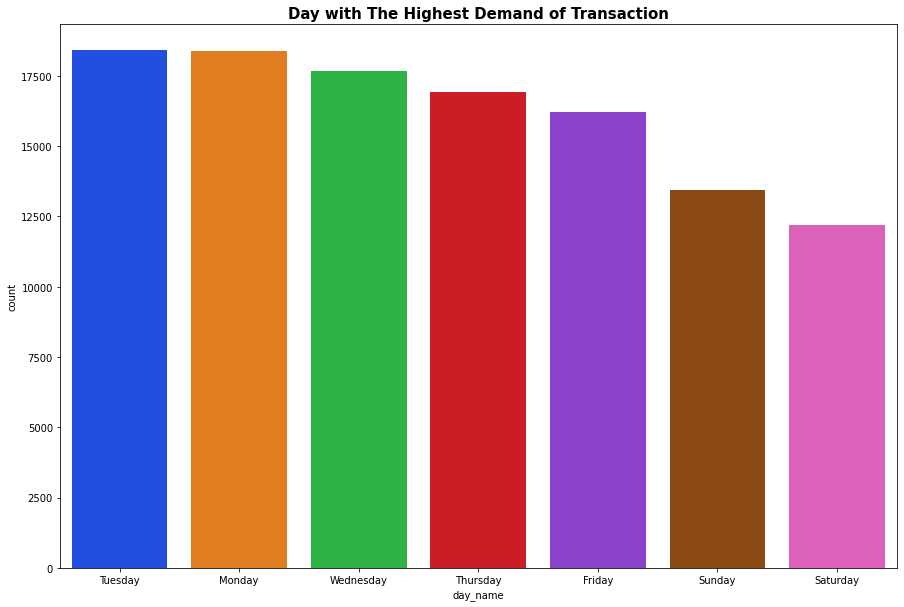

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='day_name', data=data_schema, palette='bright',
             order=data_schema['day_name'].value_counts()
             .sort_values(ascending = False).index).set_title("Day with The Highest Demand of Transaction", fontsize=15,
                                             weight='bold')

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/style.py:124: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"


Text(0.5, 1.0, 'Day with The Highest Demand of Transaction')

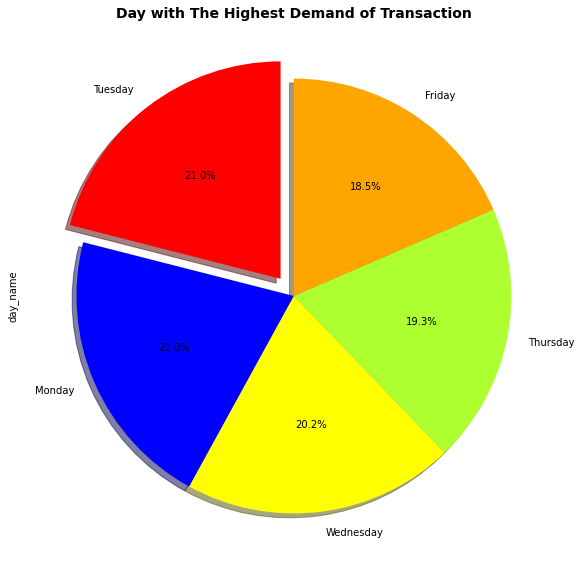

In [ ]:
plt.figure(figsize=(20,10))
colors = ['#FF0000', '#0000FF', '#FFFF00', 
          '#ADFF2F', '#FFA500']
data_schema['day_name'].value_counts()[:5].plot.pie(autopct='%1.1f%%', 
        startangle=90, cmap='tab20', explode = (0.1, 0, 0, 0,0),
        shadow=True, colors=colors)
plt.title("Day with The Highest Demand of Transaction",size=14, weight='bold')

# Total Orders by Year

In [ ]:
sales_period_yearmonth['order_delivered_customer_date'] = data_schema['order_delivered_customer_date'].dt.to_period('M')
sales_period_yearmonth.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,...,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10,2017-10-18,2017,10,...,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,18
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10,2017-10-18,2017,10,...,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10,2017-10-18,2017,10,...,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,18
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08,2017-08-28,2017,8,...,9350,maua,SP,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,37
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08,2017-08-15,2017,8,...,9350,maua,SP,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,37


In [ ]:
data_order = sales_period_yearmonth.groupby(['order_delivered_customer_date']).agg(
    total_order_monthly = pd.NamedAgg(column = 'order_id', aggfunc='count'))

dataOrderdf = pd.DataFrame(data = data_order)

In [ ]:
dataOrderdf.head()

,total_order_monthly
order_delivered_customer_date,
2016-10,251
2016-11,81
2016-12,3
2017-01,338
2017-02,1612


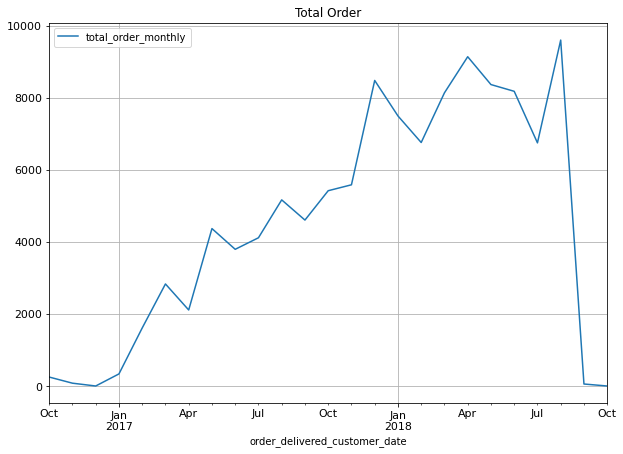

In [ ]:
dataOrderdf.plot.line(figsize=(10,7), title='Total Order', grid=True, fontsize=11)